In [1]:
import tensorflow as tf
import cv2 
import os
import numpy as np
import pandas as pd
from keras.preprocessing import image

In [2]:
category = ['happy' , 'sad']
img_format = ['jpg' , 'jpeg' , 'png' , 'bmp']

Taking happy as 1 and sad as 0

In [3]:
data= []
for categories in category:
    label = category.index(categories)
    for img_folder in os.listdir(os.path.join('data' , categories)):
        img_path = os.path.join('data', categories , img_folder)
        img = cv2.imread(img_path)
        img =cv2.resize(img , (256,256))
        data.append([img,label])    

In [4]:
len(data)

305

In [5]:
import random

In [6]:
random.shuffle(data)

In [7]:
x=[]
y=[]
for features , label in data:
    x.append(features)
    y.append(label)

In [8]:
len(x)

305

In [9]:
x = np.array(x)
y =np.array(y)

In [10]:
x =x /255

In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
X_train , X_test ,Y_train, Y_test = train_test_split(x , y, random_state= 2 ,test_size= 0.2)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense , MaxPooling2D ,Conv2D

In [14]:
model =Sequential()

In [15]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
hist = model.fit(X_train , Y_train , epochs=20, validation_data= (X_test , Y_test))

In [19]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

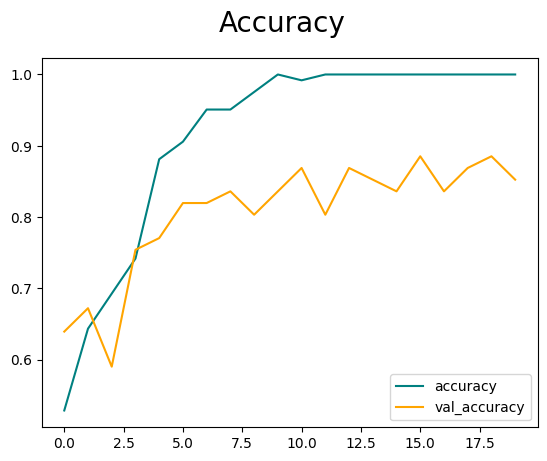

In [21]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test , Y_test)

# Results

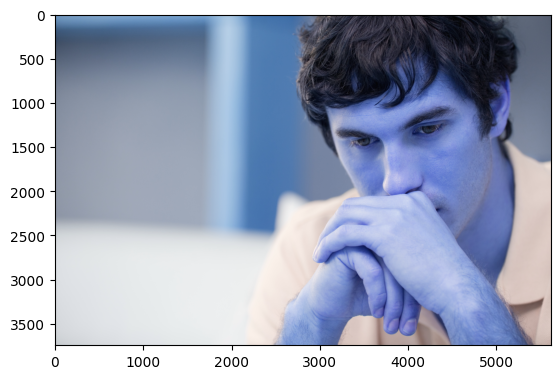

In [23]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

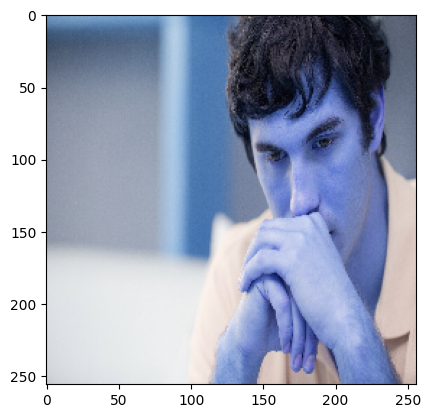

In [24]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [25]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 337ms/step


In [26]:
yhat

array([[0.9994774]], dtype=float32)

In [28]:
def predict(yhat):
    if yhat > 0.5: 
        print(f'Predicted class is Sad')
    else:
        print(f'Predicted class is Happy')

In [29]:
predict(yhat)

Predicted class is Sad


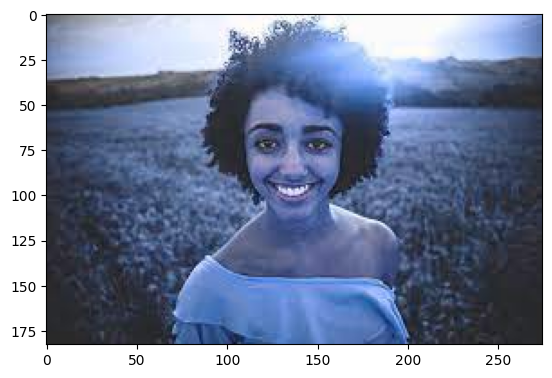

In [30]:
img = cv2.imread('download.jpg')
plt.imshow(img)
plt.show()

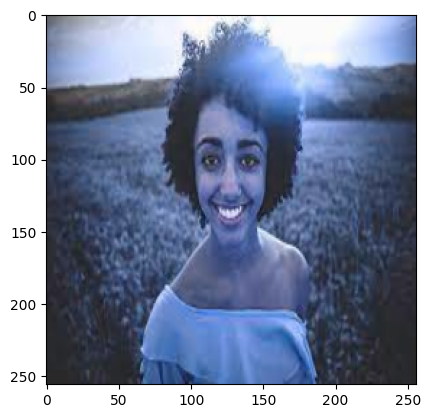

In [31]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 101ms/step


In [33]:
predict(yhat)

Predicted class is Happy


[]

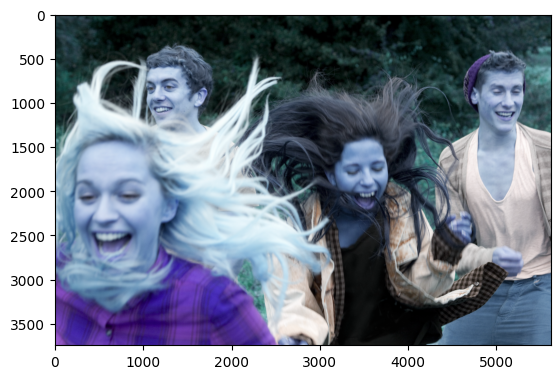

In [35]:
yhat = cv2.imread('154006829.jpg')
plt.imshow(yhat)
plt.plot()

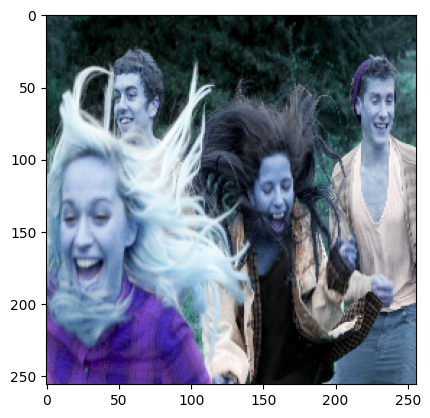

In [36]:
resize = tf.image.resize(yhat, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 74ms/step


In [38]:
predict(yhat)

Predicted class is Happy


In [1]:
from keras.applications.vgg16 import VGG16